In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-win_amd64.whl.metadata (113 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.0-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Setting up for tissue classification...
Loading training and validation datasets...
Found 660 files belonging to 2 classes.
Using 528 files for training.
Found 660 files belonging to 2 classes.
Using 132 files for validation.
Found Classes: ['Original', 'Padded']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 40s 4us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting tissue classifier training...
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.7140 - loss: 0.5179 - val_accuracy: 0.7803 - val_loss: 0.4293
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.8693 - loss: 0.3152 - val_accuracy: 0.8409 - val_loss: 0.3366
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.8769 - loss: 0.2902 - val_accuracy: 0.8409 - val_loss: 0.2942
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 315ms/step - accuracy: 0.8750 - loss: 0.2741 - val_accuracy: 0.7879 - val_loss: 0.3974
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.8769 - loss: 0.2477 - val_accuracy: 0.9015 - val_loss: 0.2740
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.8864 - loss: 0.2529 - val_accuracy: 0.8712 - val_loss: 0.2856
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.8807 - loss: 0.2510 - val_accuracy: 0.8864 - val_loss: 0.2840
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 

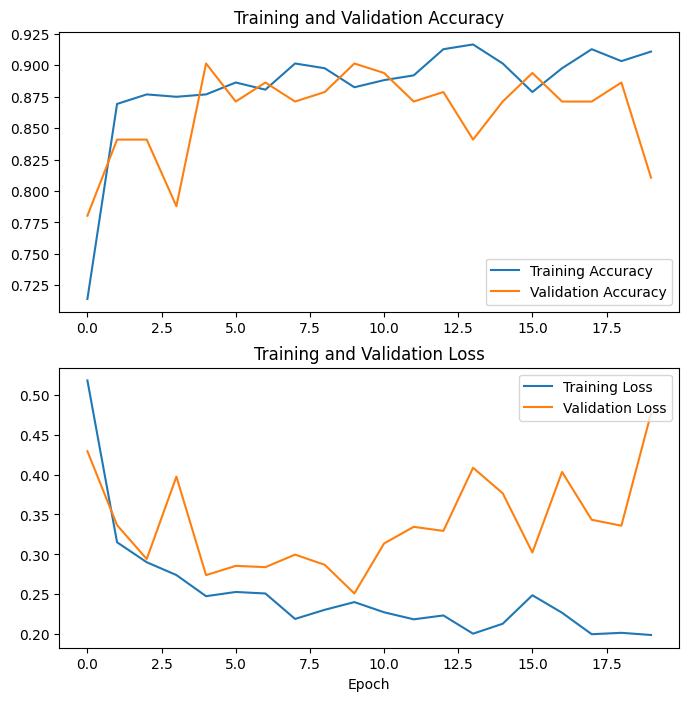

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt

print("Setting up for tissue classification...")

# --- 1. CONFIGURATION ---
TISSUE_DATASET_PATH = r'D:\EXTRAIDEAS\DFUTissueSegNet-main\DFUTissueSegNet-main\DFUTissue\Labeled' 

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 20

# --- 2. LOAD THE DATASET ---
print("Loading training and validation datasets...")
try:
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        TISSUE_DATASET_PATH,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        TISSUE_DATASET_PATH,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE
    )

    class_names = train_dataset.class_names
    print("Found Classes:", class_names)

    # --- 3. BUILD THE CLASSIFICATION MODEL WITH AUGMENTATION ---
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ])

    base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                                   include_top=False,
                                                   weights='imagenet')
    # THIS LINE IS NOW FIXED
    base_model.trainable = False 

    inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = data_augmentation(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x) 
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(len(class_names), activation='softmax')(x)
    model_classifier = tf.keras.Model(inputs, outputs)

    model_classifier.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model_classifier.summary()

    # --- 4. TRAIN THE MODEL ---
    print("\nStarting tissue classifier training...")
    history_classifier = model_classifier.fit(
        train_dataset,
        validation_data=validation_dataset,
        epochs=EPOCHS
    )
    print("Classifier training complete!")

    # --- 5. SAVE THE MODEL ---
    model_classifier.save('tissue_classifier_model_v1.keras')
    print("Tissue classifier model saved successfully!")

    # --- 6. PLOT RESULTS ---
    acc = history_classifier.history['accuracy']
    val_acc = history_classifier.history['val_accuracy']
    loss = history_classifier.history['loss']
    val_loss = history_classifier.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.show()

except FileNotFoundError:
    print(f"ERROR: The directory was not found at '{TISSUE_DATASET_PATH}'")
    print("Please make sure this is the correct path to the 'Labeled' folder.")